In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import requests
from bs4 import BeautifulSoup


mpl.style.use('seaborn')

# 1. Twitch API data

The URL `https://wind-bow.glitch.me/twitch-api/channels/{CHANNEL_NAME}` is an API from twitch to get data from twitch channels.

Get the data from the following channels:

```
["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]
```

To make into a dataframe that looks like this:

![](twitch.png)

In [2]:
channels = ["ESL_SC2", 
            "OgamingSC2", 
            "cretetion", 
            "freecodecamp", 
            "storbeck", 
            "habathcx", 
            "RobotCaleb", 
            "noobs2ninjas",
            "ninja", "shroud", 
            "Dakotaz", "esltv_cs", 
            "pokimane", 
            "tsm_bjergsen", 
            "boxbox", "wtcn", 
            "a_seagull",
            "kinggothalion", 
            "amazhs", 
            "jahrein", 
            "thenadeshot", 
            "sivhd", 
            "kingrichard"]

rqs = {}
url = 'https://wind-bow.glitch.me/twitch-api/channels/'
for c in channels:
    rqs[c] = requests.get(url + c)



In [3]:
data = {
    'id' : [],
    'display_name' : [],
    'status' : [],
    'followers' : [],
    'views' : []
}


for k,v in rqs.items():
    
    if v.status_code == 200:
        d = json.loads(v.content)
        data['id'].append(d['_id'])
        data['display_name'].append(k)
        data['status'].append(d['status'])
        data['followers'].append(d['followers'])
        data['views'].append(d['views'])

df = pd.DataFrame(data)
df

,id,display_name,status,followers,views
0,30220059,ESL_SC2,RERUN: StarCraft 2 - Terminator vs. Parting (P...,135394,60991791
1,71852806,OgamingSC2,UnderDogs - Rediffusion - Qualifier.,40895,20694507
2,90401618,cretetion,It's a Divison kind of Day,908,11631
3,79776140,freecodecamp,Greg working on Electron-Vue boilerplate w/ Ak...,10122,163747
4,86238744,storbeck,None,10,1019
5,6726509,habathcx,Massively Effective,14,764
6,54925078,RobotCaleb,Code wrangling,20,4602
7,82534701,noobs2ninjas,Building a new hackintosh for #programming and...,835,48102


# 2. App Store Reviews

The Apple app store has a `GET` API to get reviews on apps. The URL is:

```
https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json
```

Note that you need to provide:

- The country code (eg. `'us'`, `'gb'`, `'ca'`, `'au'`) 

- The app ID. This can be found in the web page for the app right after `id`. For instance, Candy Crush's US webpage is:

`https://apps.apple.com/us/app/candy-crush-saga/id553834731`

So here the ID would be `553834731`.

- The "Page Number". The request responds with multiple pages of data, but sends them one at a time. So you can cycle through the data pages for any app on any country.

### 2.1 English app reviews

Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all the english-speaking countries you can think of!).

### 2.2 Best version

For each app, get the version that is the best rated.

Make a visualization of the ratings per versions per app to show this.

### 2.3 Top words

Which word for each app is most common in the 5 star and in the 1-star review's titles?

Note: `df.title.str.get_dummies()` is your friend

Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

In [4]:
#2.1 Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all
#the english-speaking countries you can think of!).

#https://apps.apple.com/ca/app/tinder/id547702041
#https://apps.apple.com/ca/app/facebook/id284882215
#https://apps.apple.com/ca/app/twitter/id333903271

list(['us', 'gb', 'ca', 'au', 'ie', 'nz'])
COUNTRY_CODES = ['us', 'gb', 'ca', 'au', 'ie', 'nz']
APP_IDS = ['553834731', '547702041', '284882215', '333903271']
data_d = {
    'COUNTRY_CODE' : [], 
    'APP_ID' : [],
    'APP_VERSION' :[],
    'APP_RATING' : [],
    'TITLE' : [],
    'REVIEWS':[]
}

for COUNTRY_CODE in COUNTRY_CODES:
    for APP_ID_HERE in APP_IDS:
        for PAGE_NUMBER in range(1,10):
            id_num = COUNTRY_CODE+ '_' + APP_ID_HERE + '_' + str(PAGE_NUMBER)
            url  = f'https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json'
            rq = requests.get(url)
            d = json.loads(rq.content)
            entries = d['feed']['entry']
            for i in range(len(entries)):
                data_d['COUNTRY_CODE'].append(COUNTRY_CODE)
                data_d['APP_ID'].append(APP_ID_HERE)
                data_d['APP_VERSION'].append(entries[i]['im:version']['label'])
                data_d['APP_RATING'].append(entries[i]['im:rating']['label'])
                data_d['TITLE'].append(entries[i]['title']['label'])
                data_d['REVIEWS'].append(entries[i]['content']['label'])
df = pd.DataFrame(data_d)
df

,COUNTRY_CODE,APP_ID,APP_VERSION,APP_RATING,TITLE,REVIEWS
0,us,553834731,1.196.1.1,3,Annoyed,I like the game but at some point it took away...
1,us,553834731,1.196.1.1,1,Why must you antagonize players,With your 45 second ads shown on other apps?
2,us,553834731,1.196.1.1,2,Aggravating,I want a game that I can play when I have time...
3,us,553834731,1.196.1.1,1,Not loading,Another update and it did not correct the load...
4,us,553834731,1.196.1.1,5,This game is seriously addictive,"At night when I close my eyes to sleep, all I ..."
...,...,...,...,...,...,...
10795,nz,333903271,6.1,1,تويتر,اصدار سيء جداً
10796,nz,333903271,6.1,5,Tweet this,"Twitter app works a charm on 4-5s I love it, i..."
10797,nz,333903271,6.1,5,Good,Good
10798,nz,333903271,6.1,5,Great!!!,This is a great app! Simple but great and gets...


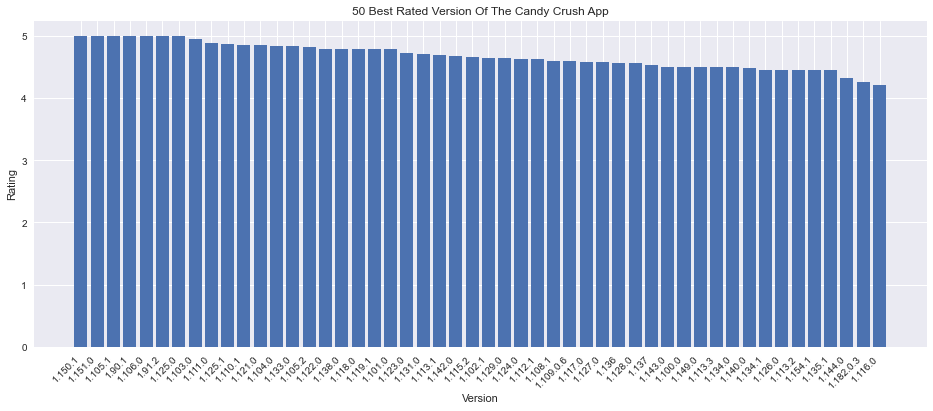

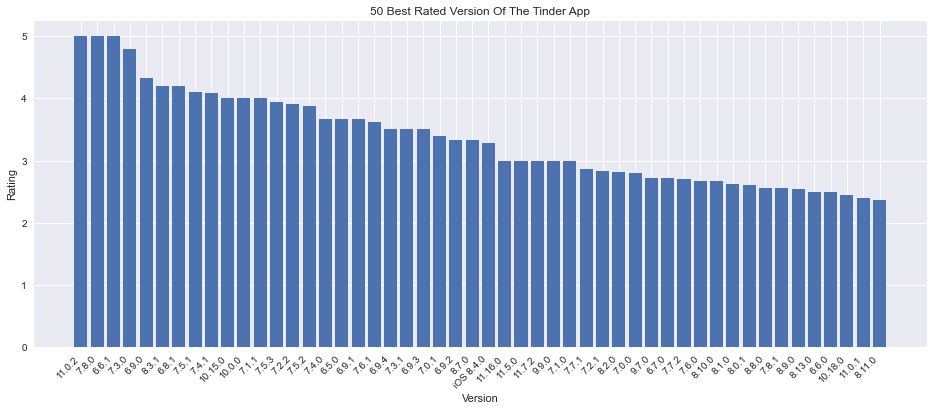

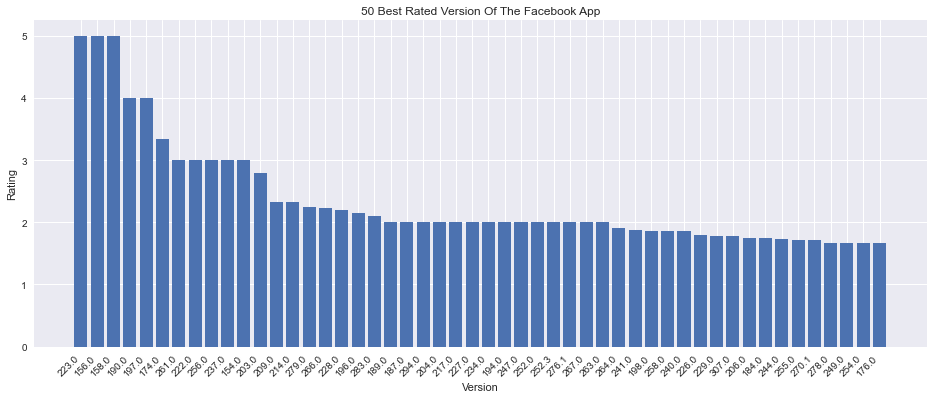

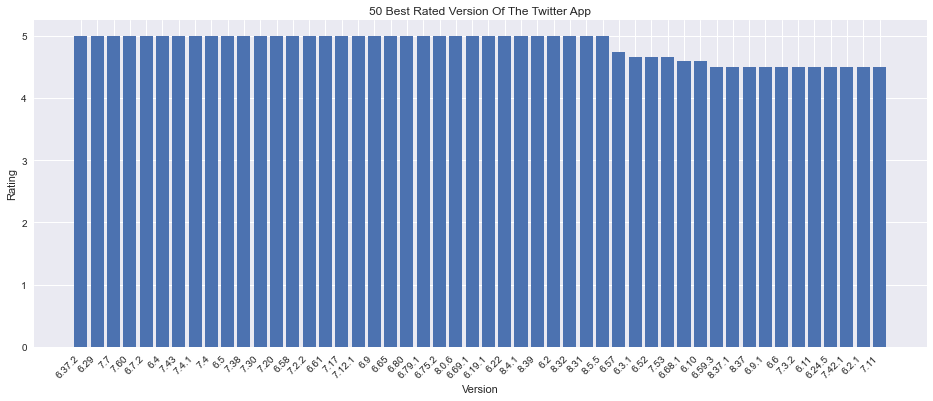

In [5]:
#2.2 For each app, get the version that is the best rated. Make a visualization of the ratings per versions per app to show
#this.

NUM_VERSIONS_TO_PLOT = 50

app_names = ['Candy Crush', 'Tinder', 'Facebook', 'Twitter']
mapper_app_id = dict(zip(APP_IDS,app_names))
df['APP_NAME'] = df['APP_ID'].map(mapper_app_id)
df['APP_RATING'] = df['APP_RATING'].astype('int')

for app in app_names:
    filter_app_name = df['APP_NAME'] == app
    df_temp = df[filter_app_name].groupby('APP_VERSION')[['APP_RATING']].mean()
    df_temp = df_temp.sort_values(by = 'APP_RATING', ascending = False)
    fig, ax = plt.subplots(figsize = (16,6))
    plt.bar(df_temp.index[:NUM_VERSIONS_TO_PLOT], df_temp['APP_RATING'][:NUM_VERSIONS_TO_PLOT])
    plt.xticks(rotation=45, ha = 'right')
    plt.xlabel('Version')
    plt.ylabel('Rating')
    plt.title(f'{NUM_VERSIONS_TO_PLOT} best rated version of the {app} app'.title())
    plt.show()

In [6]:
#2.3 Which word for each app is most common in the 5 star and in the 1-star review's titles?
#Note: df.title.str.get_dummies() is your friend
#Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.
data_d = {
    'apps':[],
    'ratings': [],
    'most_common_word':[],
    'second_most_common_word':[],
    'third_most_common_word':[],
    'fourth_most_common_word': [],
    'fifth_most_common_word': []
}
ratings = [1,5]
for app in app_names:
    for rating in ratings:
        filter_title = df['APP_NAME'] == app
        filter_rating = df['APP_RATING'] == rating
        df_temp = df[((filter_title) & (filter_rating))]
        df_temp = (df_temp['TITLE'].str.get_dummies(sep=' ')
                                       .sum()
                                       .sort_values(ascending = False))
        data_d['apps'].append(app)
        data_d['ratings'].append(rating)
        for i,v in enumerate(['most_common_word', 'second_most_common_word','third_most_common_word','fourth_most_common_word', 'fifth_most_common_word']):
            data_d[v].append(df_temp.index[i])


df = pd.DataFrame(data_d)
df

,apps,ratings,most_common_word,second_most_common_word,third_most_common_word,fourth_most_common_word,fifth_most_common_word
0,Candy Crush,1,game,to,the,update,Candy
1,Candy Crush,5,Candy,game,crush,Great,Love
2,Tinder,1,for,no,Banned,reason,app
3,Tinder,5,app,Great,my,Good,Tinder
4,Facebook,1,Facebook,Censorship,and,the,is
5,Facebook,5,Good,Facebook,Great,and,App
6,Twitter,1,Twitter,Censorship,of,speech,is
7,Twitter,5,Twitter,app,Great,to,Good


# 3 (STRETCH) IMDB scraping

IMDB has structured web pages. We can exploit this to scrape movie data.

Usinf the following URL:

`https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt`

With the following headers in your `GET` request: `{"Accept-Language": "en-US,en;q=0.5"}`

You can generate a dataframe like this one by cycling over the page numbers in the URL requested:

![](IMDB.png)

Note that the following  page attribues will be of interest:

- `div` with a class of `lister-item mode-advanced`

- Various `span` objects within that `div` like `lister-item-year` and `runtime` and `metascore`

In [7]:
movie_data = {
    'movies' : [],
    'year' : [],    
    'imdb' : [], 
    'metascore' : [],
    'votes' : [],
    'us_grossMillions' : [],
    'runtime' : []
}

total_num_movies = 1000
idx_first_movie_on_page = 0
increment = 50

for idx_first_movie_on_page in range(idx_first_movie_on_page , total_num_movies, increment):
    i = idx_first_movie_on_page
    PAGE_NUMBER = i
    
    #Fetch page
    url = f'https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt'
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    movies_html = soup.find_all(class_ = 'lister-item mode-advanced')
    
    #Loop through each movies on each page and extract the following information : movie title, year released, imdb rating
    #metascore rating, number of votes, Gross Millions in us, and runtime 
    for i in range(len(movies_html)):
        movie_data['movies'].append(movies_html[i].find(class_ = 'lister-item-content').a.string)
        movie_data['year'].append(movies_html[i].find(class_ = 'lister-item-year').string.replace('(', '').replace(')', ''))
        movie_data['imdb'].append(movies_html[i].find(class_ = 'inline-block ratings-imdb-rating').strong.string)
        if movies_html[i].find(class_ = 'metascore favorable') != None:
            movie_data['metascore'].append(movies_html[i].find(class_ = 'metascore favorable').string.strip())
        else:
            movie_data['metascore'].append(None)

        if len(movies_html[i].find(class_ = 'lister-item-content').find_all('span', {'class' : 'text-muted'}))>=3:
            movie_data['votes'].append(movies_html[i].find_all('span', {'name' : 'nv'})[-2].string.replace(',', ''))
            movie_data['us_grossMillions'].append(movies_html[i].find_all('span', {'name' : 'nv'})[-1].string.replace('$', '')[:-1])
        else:
            if movies_html[i].find(class_ = 'lister-item-content').find_all('span', {'class' : 'text-muted'})[1].string == 'Votes:':
                movie_data['votes'].append(movies_html[i].find_all('span', {'name' : 'nv'})[0].string.replace(',', ''))
                movie_data['us_grossMillions'].append(None)
            elif movies_html[i].find(class_ = 'lister-item-content').find_all('span', {'class' : 'text-muted'})[1].string == 'Gross:': 
                movie_data['votes'].append(None)

        movie_data['runtime'].append(movies_html[i].find(class_ = 'runtime').string.replace(' min', ''))


In [8]:
df = pd.DataFrame(movie_data)
df

,movies,year,imdb,metascore,votes,us_grossMillions,runtime
0,Soul,2020,8.1,83,186447,None,100
1,Avengers: Endgame,2019,8.4,78,823817,858.37,181
2,The Silence of the Lambs,1991,8.6,85,1278628,130.74,118
3,The Trial of the Chicago 7,2020,7.8,77,101623,None,129
4,Once Upon a Time... in Hollywood,2019,7.6,83,560094,142.50,161
...,...,...,...,...,...,...,...
995,OMG: Oh My God!,2012,8.1,None,51948,0.92,125
996,Vizontele,2001,8.0,None,33778,None,110
997,Kai po che!,2013,7.7,None,32790,1.12,130
998,Lage Raho Munna Bhai,2006,8.1,None,43269,2.22,144
